In [2]:
import pandas as pd

# Dataset 1: Precio medio por metro cuadrado de toda España.

Extraido de idealista.com por Adrian 

Coste 5€

In [14]:
df_pm = pd.read_csv("Historico_precios.csv",sep="\t")

df_pm = df_pm.drop(['Variación mensual','Variación trimestral','Variación anual'],axis=1)

df_pm.head()

,Mes,Precio m2
0,Diciembre 2022,1.921 €/m2
1,Noviembre 2022,1.929 €/m2
2,Octubre 2022,1.910 €/m2
3,Septiembre 2022,1.893 €/m2
4,Agosto 2022,1.896 €/m2


In [6]:
df_pm.shape

(204, 5)

# Dataset 2: Histórico del IPC

Extraido desde https://www.ine.es/consul/serie.do?d=true&s=IPC251852&c=2&

In [16]:
df_ipc = pd.read_csv("series324445766c.csv")

df_ipc = df_ipc.drop(['PERIODO','TIPO DATO','NOTA'],axis=1)

df_ipc.head()

,VALOR
2022M12,899
2022M11,734
2022M10,866
2022M09,498
2022M08,265


# Objetivo: Crear un modelo de Regresión Lineal para precedir el precio medio en base al IPC


Tarea 1: Arreglar los datos

In [20]:
diccionario_meses = {
    '01':'Enero',
    '02':'Febrero',
    '03':'Marzo',
    '04':'Abril',
    '05':'Mayo',
    '06':'Junio',
    '07':'Julio',
    '08':'Agosto',
    '09':'Septiembre',
    '10':'Octubre',
    '11':'Noviembre',
    '12':'Diciembre'    
}

In [24]:
df_ipc = df_ipc.reset_index().rename({'index':'Fecha'},axis=1)

In [25]:
fecha_ejemplo = '2022M11' # Noviembre 2022

In [26]:
fecha_ejemplo.split("M")

['2022', '11']

In [27]:
def transforma_fechas(fecha):
    fecha_n = None

    anio = fecha.split("M")[0]
    mes_numerico = fecha.split("M")[1]
    # anio,mes_numerico = fecha.split("M")[0],fecha.split("M")[1]

    mes_string = diccionario_meses[mes_numerico]
    fecha_n = mes_string+" "+anio
    return fecha_n

In [30]:
df_ipc['Mes'] = df_ipc.Fecha.apply(transforma_fechas)

In [32]:
df_ipc.drop('Fecha',axis=1,inplace=True)

In [33]:
df_ipc

,VALOR,Mes
0,899,Diciembre 2022
1,734,Noviembre 2022
2,866,Octubre 2022
3,498,Septiembre 2022
4,265,Agosto 2022
...,...,...
247,374,Mayo 2002
248,118,Abril 2002
249,165,Marzo 2002
250,590,Febrero 2002


Tarea 2: Juntar los dataframes

In [67]:
df = pd.merge(df_ipc,df_pm,on='Mes',how='inner')

In [68]:
df

,VALOR,Mes,Precio m2
0,899,Diciembre 2022,1.921 €/m2
1,734,Noviembre 2022,1.929 €/m2
2,866,Octubre 2022,1.910 €/m2
3,498,Septiembre 2022,1.893 €/m2
4,265,Agosto 2022,1.896 €/m2
...,...,...,...
199,251,Mayo 2006,1.937 €/m2
200,959,Abril 2006,1.934 €/m2
201,833,Marzo 2006,1.951 €/m2
202,272,Febrero 2006,1.972 €/m2


Tarea 3: Arreglar las columnas para que sean numéricas 

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VALOR      204 non-null    int64 
 1   Mes        204 non-null    object
 2   Precio m2  204 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.4+ KB


In [70]:
# Solucion Adrian
df['Precio m2'].str.replace(" €/m2","")

# Solución Irene con ayuda de Carlos
df['Precio m2'].apply(lambda x: x.split(" ")[0])
df['Precio m2'].str.split(' ').apply(lambda x: x[0])

# Escoge la que más te guste :)

0      1.921
1      1.929
2      1.910
3      1.893
4      1.896
       ...  
199    1.937
200    1.934
201    1.951
202    1.972
203    1.975
Name: Precio m2, Length: 204, dtype: object

In [71]:
df['Precio m2'] = df['Precio m2'].str.replace(" €/m2","")

In [72]:
df['Precio m2'] = df['Precio m2'].str.replace(".","").astype(float)

/tmp/ipykernel_681/2412696128.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Precio m2'] = df['Precio m2'].str.replace(".","").astype(float)


In [73]:
df.head()

,VALOR,Mes,Precio m2
0,899,Diciembre 2022,1921.0
1,734,Noviembre 2022,1929.0
2,866,Octubre 2022,1910.0
3,498,Septiembre 2022,1893.0
4,265,Agosto 2022,1896.0


Paso 4: E D A 

In [74]:
df.rename({'VALOR':'IPC'},axis=1,inplace=True)

In [75]:
df.describe()

,IPC,Precio m2
count,204.000000,204.000000
mean,481.009804,1772.803922
std,288.168824,171.460779
min,1.000000,1496.000000
25%,229.000000,1606.750000
50%,478.000000,1781.500000
75%,734.500000,1927.500000
max,999.000000,2053.000000


In [76]:
df['año'] = df.Mes.apply(lambda x: x.split(" ")[1])

In [77]:
df[df.año=="2022"]

,IPC,Mes,Precio m2,año
0,899,Diciembre 2022,1921.0,2022
1,734,Noviembre 2022,1929.0,2022
2,866,Octubre 2022,1910.0,2022
3,498,Septiembre 2022,1893.0,2022
4,265,Agosto 2022,1896.0,2022
5,986,Julio 2022,1888.0,2022
6,267,Junio 2022,1876.0,2022
7,262,Mayo 2022,1869.0,2022
8,375,Abril 2022,1853.0,2022
9,566,Marzo 2022,1825.0,2022


In [78]:
df_2022 = df[df.año=="2022"]

In [79]:
df_2022

,IPC,Mes,Precio m2,año
0,899,Diciembre 2022,1921.0,2022
1,734,Noviembre 2022,1929.0,2022
2,866,Octubre 2022,1910.0,2022
3,498,Septiembre 2022,1893.0,2022
4,265,Agosto 2022,1896.0,2022
5,986,Julio 2022,1888.0,2022
6,267,Junio 2022,1876.0,2022
7,262,Mayo 2022,1869.0,2022
8,375,Abril 2022,1853.0,2022
9,566,Marzo 2022,1825.0,2022


In [80]:
df_2022.describe()

,IPC,Precio m2
count,12.000000,12.000000
mean,557.333333,1874.833333
std,260.193052,38.769326
min,262.000000,1814.000000
25%,348.000000,1846.000000
50%,532.000000,1882.000000
75%,767.000000,1899.500000
max,986.000000,1929.000000


In [81]:
df_2022.corr()

/tmp/ipykernel_681/940527546.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2022.corr()


,IPC,Precio m2
IPC,1.000000,0.436243
Precio m2,0.436243,1.000000


<AxesSubplot: >

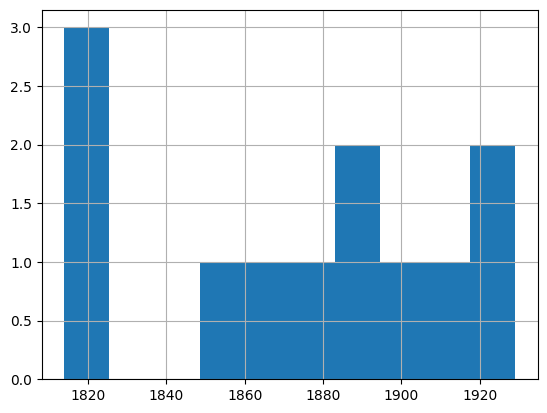

In [83]:
df_2022['Precio m2'].hist()

Normalizamos el target

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()

scaler.fit(df_2022['Precio m2'].values.reshape(-1,1))

df_2022['precio_escalado'] = scaler.transform(df_2022['Precio m2'].values.reshape(-1,1))

/tmp/ipykernel_681/3807717616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['precio_escalado'] = scaler.transform(df_2022['Precio m2'].values.reshape(-1,1))


<AxesSubplot: >

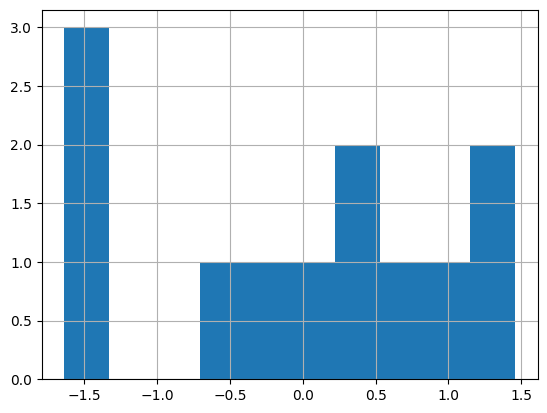

In [106]:
df_2022['precio_escalado'].hist()

In [134]:
df_2022['Precio m2'].mean()

1874.8333333333333

In [135]:
round(df_2022['precio_escalado'].mean())

0

In [136]:
df_2022['Precio m2'].std()

38.76932558170965

In [137]:
round(df_2022['precio_escalado'].std())

1

In [107]:
from scipy.stats import shapiro

In [109]:
shapiro(df_2022['precio_escalado'])

ShapiroResult(statistic=0.9384642243385315, pvalue=0.4784366190433502)

In [110]:
shapiro(df_2022['Precio m2'])

ShapiroResult(statistic=0.9384642243385315, pvalue=0.4784366190433502)

In [113]:
import matplotlib.pyplot as plt

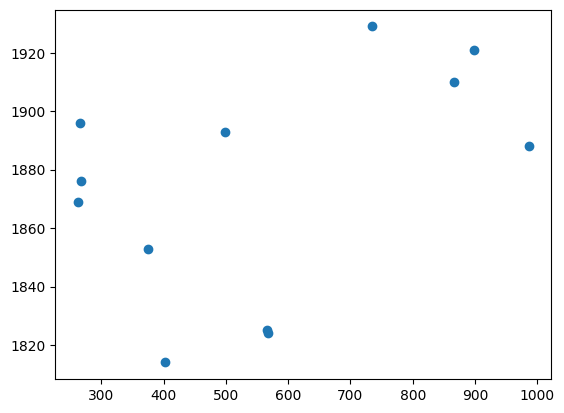

In [114]:
plt.scatter(df_2022['IPC'],df_2022['Precio m2'])

In [111]:
from sklearn.linear_model import LinearRegression

In [120]:
model = LinearRegression()

In [121]:
model.fit(df_2022['IPC'].values.reshape(-1,1),
          df_2022['Precio m2'].values.reshape(-1,1))

LinearRegression()

In [122]:
model.intercept_

array([1838.60602055])

In [123]:
model.coef_

array([[0.06500116]])

In [124]:
pred = model.predict(df_2022['IPC'].values.reshape(-1,1))

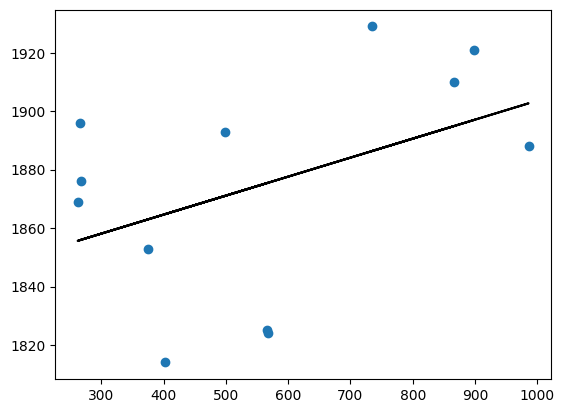

In [128]:
plt.scatter(df_2022['IPC'],df_2022['Precio m2'])
plt.plot(df_2022['IPC'],pred,color='k')

In [129]:
from sklearn.metrics import r2_score

In [131]:
r2_score(df_2022['Precio m2'],pred)

0.19030802510035283